# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

Откроем данные и посмотрим, какие параметры есть в таблице, типы данных и количество ненулевых значений. Построим гистаграммы для общего представления данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

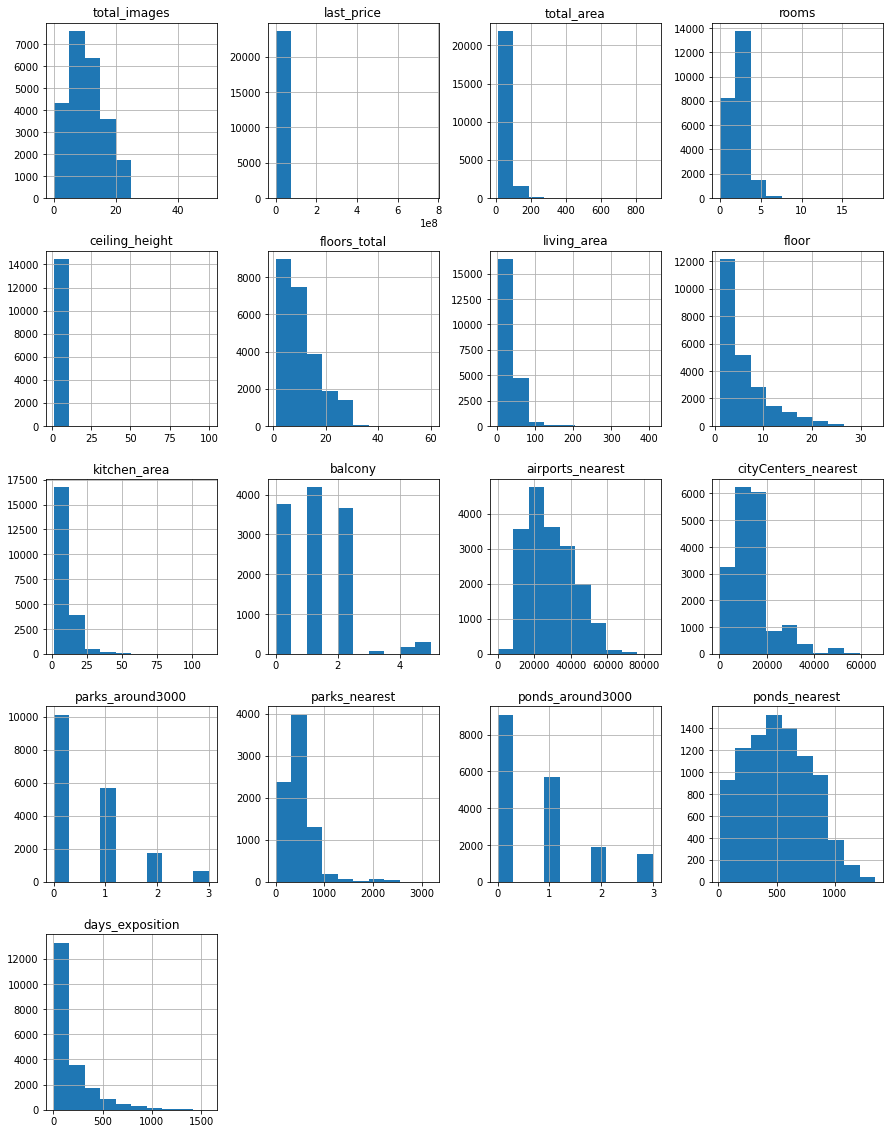

In [ ]:
data.hist(figsize=(15, 20))

Предварительные выводы:
1. first_day_exposition -  необходимо преобразовать в тип дата-время (datetime)
2. ceiling_height - присутствуют нулевые значения
3. floors_total - необходимо преобразовать в int, т.к. количество этажей вероятно должно быть целым
4. is_apartment - должен быть логическим типом
5. living_area - присутствуют нулевые значения
6. kitchen_area - присутствуют нулевые значения
7. balcony - нулевые значения (скорее всего в таком случае балконы отсутствуют)
8. locality_name - нулевые значения
9. airports_nearest - нулевые значения
10. cityCenters_nearest - нулевые значения
11. parks_around3000 - число парков должно быть целым - int
12. parks_nearest - нулевые значения
13. ponds_around3000 - число водоемов должно быть целым - int
14. ponds_nearest - нулевые значения
15. days_exposition - количество дней должно быть int

### Предобработка данных

Посмотрим количество отсутствующих значений

In [ ]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполним пропуски в столбце с высотой потолка медианными значениями и исправим ошибки при заполнении данных

In [ ]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())
data.loc[data['ceiling_height']>10, 'ceiling_height'] = data['ceiling_height']/10

In [ ]:
data['locality_name'].dropna()
data.dropna(subset=['locality_name','floors_total'], inplace=True)

Заменим пропуски на нули, там где это целесообразно и обоснованно

In [ ]:
data['balcony'] = data['balcony'].fillna(value=0) #скорее всего пропуск означает отсутствие балконов
data['airports_nearest']=data['airports_nearest'].fillna(0)
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(-1)
#data['parks_around3000']=data['parks_around3000'].fillna(0) лучше пока не менять, чтобы не исказить данные
#data['parks_nearest']=data['parks_nearest'].fillna(0) лучше пока не менять, чтобы не исказить данные
data['days_exposition']=data['days_exposition'].fillna(data['days_exposition'].median())
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
dtype: int64

<div class="alert alert-info">

<p>Оставим столбцы о наличии водоемов без изменений, поскольку эта информация в дальнейшем не потребуется. Пропуски в данных о площади кухни и жилой площади не значительны (до 10% ), поэтому оставим эти пропуски без изменений</p>
</div>

Проверим, какие уникальные значения есть в столбце апартаменты. Вероятно, значение nan можно изменить на False.

In [ ]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [ ]:
data['is_apartment'].fillna(False, inplace=True)

Изменим тип данных в столбце балконы, там не должно быть дробных чисел

In [ ]:
data['balcony'] = data['balcony'].astype('int64')

Приведем названия поселков к общему виду

In [ ]:
data['locality_name'] = data['locality_name'].str.replace("посёлок", "поселок")

Преобразуем данные в столбце 'first_day_exposition' в дату и время

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Посмотрим названия населенных пунктов с целью выявления и удаления неявных дубликатов

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [ ]:
data['locality_name']= data['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово')
data['locality_name']= data['locality_name'].replace('деревня Фёдоровское', 'городской поселок Фёдоровское')
data['locality_name']= data['locality_name'].replace('Кудрово', 'поселок Кудрово')
data['locality_name']= data['locality_name'].replace('Мурино', 'поселок Мурино')
data['locality_name']= data['locality_name'].replace('Никольское', 'село Никольское')
data['locality_name']= data['locality_name'].replace('городской поселок Рощино', 'поселок городского типа Рощино')
data['locality_name']= data['locality_name'].replace( ['городской поселок Павлово','село Павлово'], 'поселок городского типа Павлово')
data['locality_name']= data['locality_name'].replace('городской поселок Советский', 'поселок городского типа Советский')
data['locality_name']= data['locality_name'].replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')
data['locality_name']= data['locality_name'].replace('деревня Зимитицы', 'поселок Зимитицы')
data['locality_name']= data['locality_name'].replace('коттеджный поселок Лесное', 'поселок Лесное')
data['locality_name']= data['locality_name'].replace('деревня Гарболово', 'поселок Гарболово')
data['locality_name']= data['locality_name'].replace('деревня Калитино', 'поселок Калитино')
data['locality_name']= data['locality_name'].replace('деревня Щеглово', 'поселок Щеглово')
data['locality_name']= data['locality_name'].replace('деревня Рабитицы', 'поселок Рабитицы')
data['locality_name']= data['locality_name'].replace('городской поселок Назия', 'поселок городского типа Назия')

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем цену одного квадратного метра:

In [ ]:
data['price_per_sq'] = round(data['last_price'] / data['total_area'], 1)
print(data['price_per_sq'])

0        120370.4
1         82920.8
2         92785.7
3        408176.1
4        100000.0
           ...   
23694     72490.8
23695     52542.4
23696     44091.7
23697    149511.4
23698     41795.7
Name: price_per_sq, Length: 23565, dtype: float64


Добавим отдельные столбцы для дня недели, месяца и года публикации объявления:

In [ ]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Тип этажа квартиры определим с помощью функции:

In [ ]:
def type_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif floor<floors_total and floor>1 :
        return 'другой'

#вызовем функцию для заполнения столбца категорий
data['type_floor'] = data.apply(type_floor, axis = 1)

Переведем расстояние до центра города в километры:

In [ ]:
data['cityCenters_nearest_km']=round(data['cityCenters_nearest']/1000)

### Проведите исследовательский анализ данных

Изучим различные параметры исследуемых объектов
<p><b>1) Общая площадь</b></p>

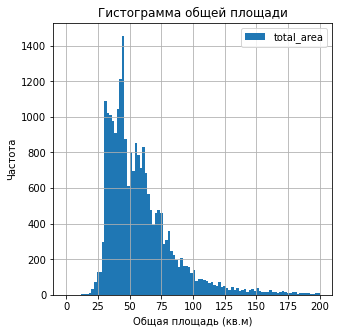

In [ ]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,200))
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь (кв.м)')
plt.ylabel('Частота')
import warnings
warnings.filterwarnings('ignore')

Гистограмма показывает, что в данных есть выбросы, например площадь - 900 кв.м. Больше всего квартир представлены в диапазоне общей площадью от 25 до 70 кв.м

<b>2) Жилая площадь: гистограмма имеет рваный характер, очевидно из-за пропусков в данных и некоторого числа выбросов</b>

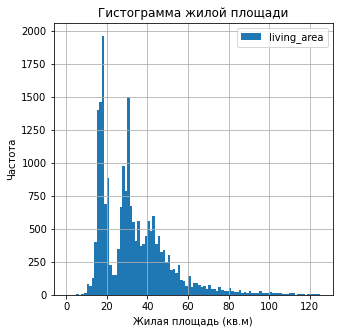

In [ ]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,125))
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь (кв.м)')
plt.ylabel('Частота')
import warnings
warnings.filterwarnings('ignore')

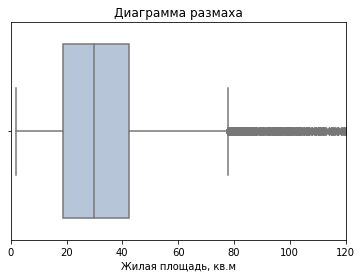

In [ ]:
# построим диаграмму размаха, ограничив площадь 120 кв.м
import seaborn as sns
sns.boxplot(data['living_area'], color='lightsteelblue')
plt.title('Диаграмма размаха')
plt.xlabel('Жилая площадь, кв.м')
plt.xlim(0, 120)
plt.show()
import warnings
warnings.filterwarnings('ignore')

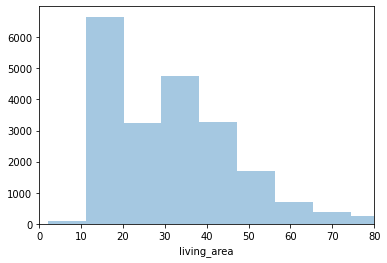

In [ ]:
# Построим диаграмму для объектов с площадью менее 80 кв.м.
sns.distplot(data['living_area'], kde=False, bins=45)
plt.xlim(0, 80)
plt.show()

<b>3) Площадь кухни</b>

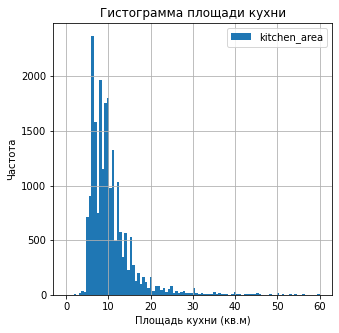

In [ ]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,60))
plt.title('Гистограмма площади кухни')
plt.xlabel('Площадь кухни (кв.м)')
plt.ylabel('Частота')
import warnings
warnings.filterwarnings('ignore')

(0.0, 30.0)

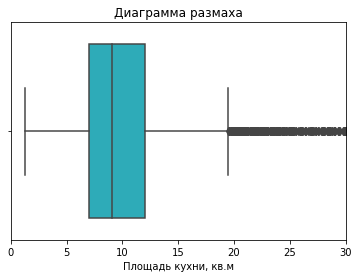

In [ ]:
sns.boxplot(data['kitchen_area'], color='tab:cyan')
plt.title('Диаграмма размаха')
plt.xlabel('Площадь кухни, кв.м')
plt.xlim(0, 30)

<b>Цена квадратного метра: больше всего квартир представлено в категории цен около 100000 за кв.м</b>

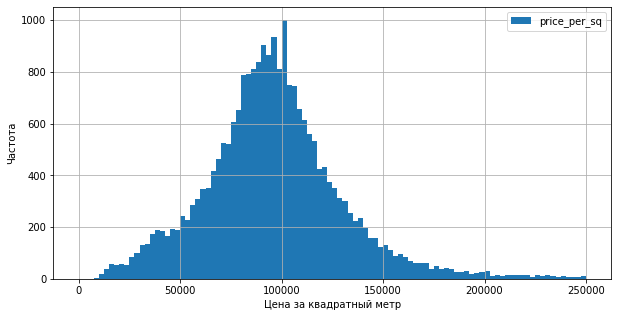

In [ ]:
data.plot(y = 'price_per_sq', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,250000))
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Частота')
import warnings
warnings.filterwarnings('ignore')

<b>5) Количество комнат: чаще всего продают 2 и 3-х комнатные квартиры, максимальное значение - 19 можно считать выбросом</b>

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

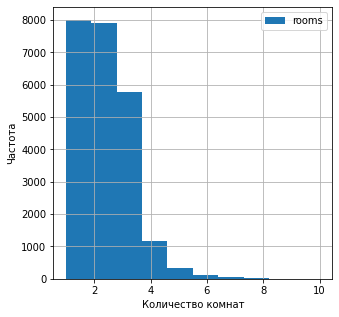

In [ ]:
data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (1,10))
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
import warnings
warnings.filterwarnings('ignore')
data['rooms'].describe()

<b>6) Высота потолка: чаще всего представлена стандартная высота - 2,75 м.</b>

<AxesSubplot:ylabel='Frequency'>

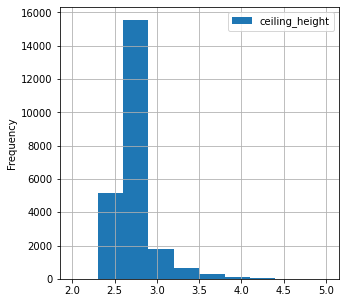

In [ ]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (2,5))

<b>7) Этаж квартиры: распределение показывает, что преобладают малоэтажные постройки</b>

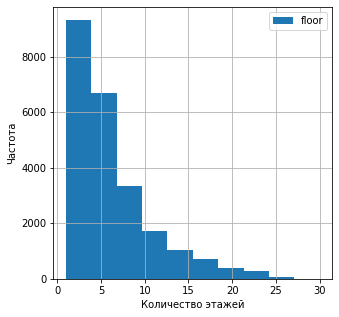

In [ ]:
data.plot(y = 'floor', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (1,30))
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
import warnings
warnings.filterwarnings('ignore')

<b>8) Тип этажа квартиры («первый», «последний», «другой»). Как и ожидалось, квартир на первых и последних этажах меньше.</b>

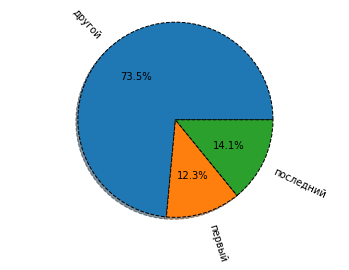

In [ ]:
labels_count=data.groupby('type_floor').count()
vals = labels_count['floor']
labels = ["другой", "первый", "последний"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
import warnings
warnings.filterwarnings('ignore')

<b>9) Общее количество этажей в доме: более всего представлены пяти- и девятиэтажные дома</b>

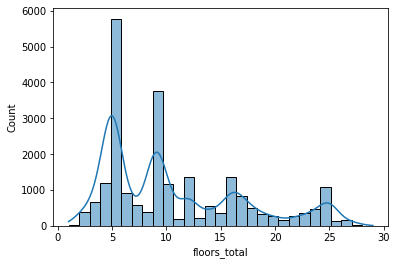

In [ ]:
sns.histplot(data=data.query('floors_total<30'),x='floors_total',kde=True,bins=29)
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-info"> Коммментарии студента</div><b>10) Расстояние до центра города в метрах: в среднем продаваемые квартиры находится в пределах 10-11 км от центра города</b>

count    23565.000000
mean     10879.297178
std       9639.609656
min         -1.000000
25%       2186.000000
50%      11246.000000
75%      15237.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

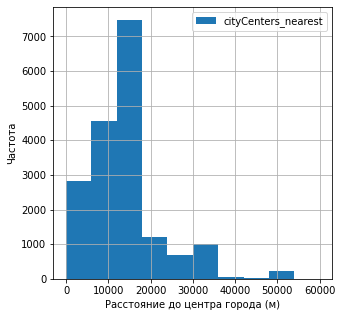

In [ ]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (1,60000))
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Частота')
import warnings
warnings.filterwarnings('ignore')
data['cityCenters_nearest'].describe()

<div class="alert alert-info"> Коммментарии студента</div><b><b>11) Расстояние до ближайшего аэропорта с среднем составляет около 22 км.</b>

count    23565.000000
mean     22046.601697
std      16462.135803
min          0.000000
25%      10143.000000
50%      21854.000000
75%      34324.000000
max      84869.000000
Name: airports_nearest, dtype: float64

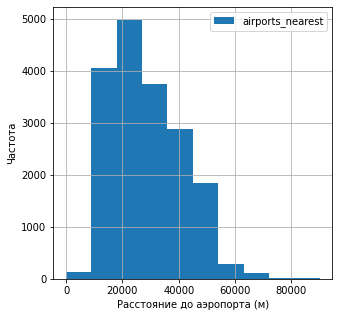

In [ ]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (1,90000))
plt.xlabel('Расстояние до аэропорта (м)')
plt.ylabel('Частота')
import warnings
warnings.filterwarnings('ignore')
data['airports_nearest'].describe()

<div class="alert alert-info"> Коммментарии студента</div><b><b>12) Расстояние до ближайшего парка. Судя по гистограмме, парки в основном находятся в шаговой доступности</b>

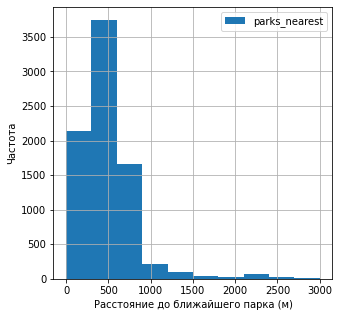

In [ ]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (1,3000))
plt.xlabel('Расстояние до ближайшего парка (м)')
plt.ylabel('Частота')
import warnings
warnings.filterwarnings('ignore')

<b>13) День и месяц публикации объявления. Объявления о продаже кваритиры чаще размещались осенью и зимой, за исключением января
<p>Доля объявлений, размещенных в выходные существенно ниже</p></b>

<AxesSubplot:xlabel='first_day_exposition'>

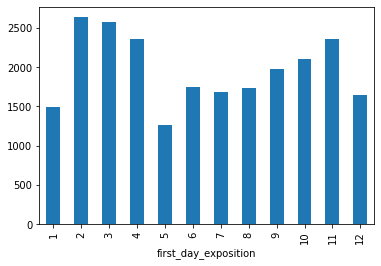

In [ ]:
data['locality_name'].groupby(data['first_day_exposition'].dt.month).count().plot(kind="bar")

<AxesSubplot:>

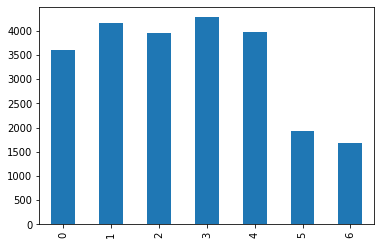

In [ ]:
data['first_day_exposition'].dt.weekday.value_counts().sort_index().plot(kind='bar')

<b> Скорость продажи квартиры</b>. Изучим как быстро продавались квартиры, посмотрим на количество дней размещения каждого объявления.


count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

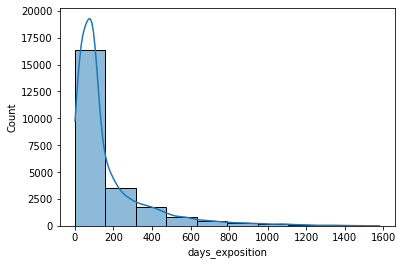

In [ ]:
sns.histplot(data=data,x='days_exposition',kde=True,bins=10)
data.days_exposition.describe()

(0.0, 450.0)

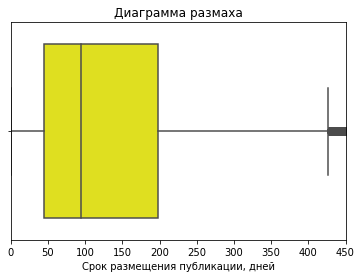

In [ ]:
sns.boxplot(data['days_exposition'], color='yellow')
plt.title('Диаграмма размаха')
plt.xlabel('Срок размещения публикации, дней')
plt.xlim(0, 450)

Как правило, продажа квартиры занимала не более <b>3 месяцев (95 дней)</b>. Четверть всех объявлений недвижимости была закрыта в течение <b>45 дней</b> с момента публикации. Если объект был продан только после 428 дней с момента публикации, это говорит об достаточно долгой продаже, быстыми продажами можно считать срок в течении 1 месяца.


<b>Факторы, влияющие на общую стоимость объекта</b>

1) Посмотрим диапазон цен на квартиры

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

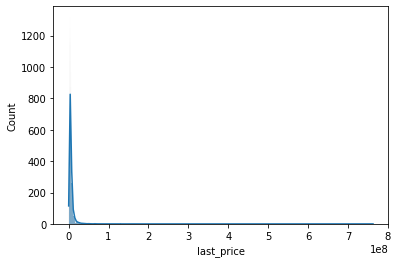

In [ ]:
sns.histplot(data=data,x='last_price',kde=True)
data.last_price.describe()

<div class="alert alert-info"><b>Коммментарии студента:
откажемся от удаления данных выше "уса" межквартильного размаха</b></div>

In [ ]:
#q1=data.last_price.quantile(0.25)
#q3=data.last_price.quantile(0.75)
#dq=q3-q1
#data=data.query('last_price<=@q3+1.5*@dq')
#sns.histplot(data=data,x='last_price',kde=True)

<AxesSubplot:xlabel='last_price', ylabel='Count'>

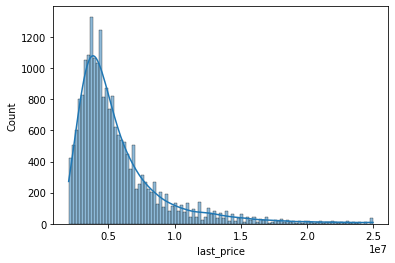

In [ ]:
sns.histplot(data=data.query('2000000<=last_price<=25000000'),x='last_price',kde=True)

In [ ]:
data_new=data.query('2000000<=last_price<=25000000 & total_area<200000 & 2<=ceiling_height<5')

In [ ]:
# КОД РЕВЬЮЕРА 2

print(len(data_new))

data_new[['last_price', 'total_area','rooms', 'ceiling_height']].describe().loc[['min', 'max']]

21721


,last_price,total_area,rooms,ceiling_height
min,2000000.0,12.0,0.0,2.0
max,25000000.0,460.8,14.0,4.8


Теперь можно оценить, как цена зависит от общей площади недвижимости. Построим диаграмму рассеивания

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

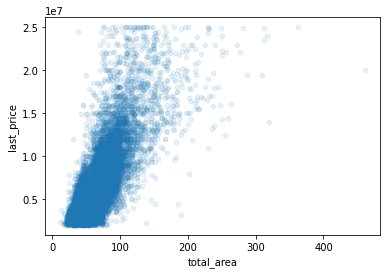

In [ ]:
data_new.plot(x='total_area', y='last_price',kind='scatter', alpha=0.1)

In [ ]:
data_new.last_price.describe()

count    2.172100e+04
mean     5.860838e+06
std      3.606737e+06
min      2.000000e+06
25%      3.600000e+06
50%      4.750000e+06
75%      6.790000e+06
max      2.500000e+07
Name: last_price, dtype: float64

Исходя из диаграммы, можно очевидно заключить, что чем больше площадь квартиры, тем выше цена.
<p>2) Аналагочно посмотрим зависимость от жилой площади</p>

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

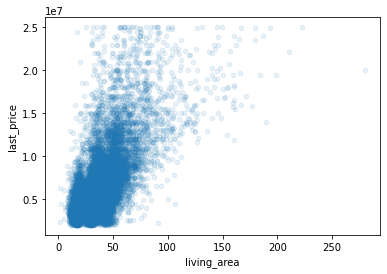

In [ ]:
data_new.plot(x='living_area', y='last_price',kind='scatter', alpha=0.1)

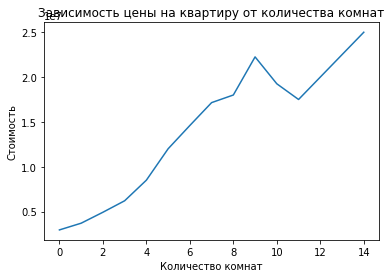

In [ ]:
data_new.groupby('rooms')['last_price'].median().plot()
plt.title('Зависимость цены на квартиру от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.show()

3) Посмотрим, является ли кухня важным фактором ценообразования

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

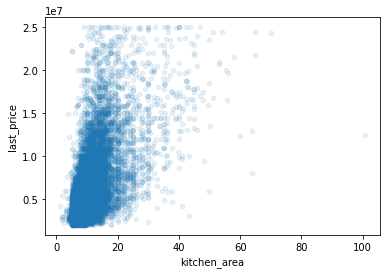

In [ ]:
data_new.plot(x='kitchen_area', y='last_price',kind='scatter', alpha=0.1)


Зависимость наблюдается, но не такая очевидная, как в случае общей площади

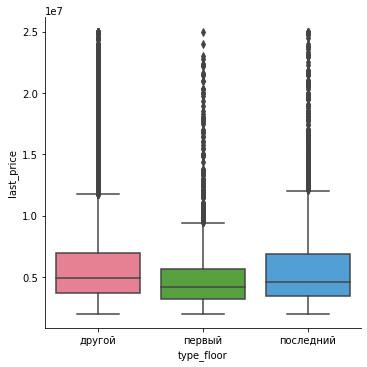

In [ ]:
for column in ['type_floor']:
    sns.catplot(x=column, y="last_price", kind="box", data=data_new, palette='husl')

4) Оценим, как даты размещения (день недели, месяц, год) могут повлиять на стоимость объектов недвижимости

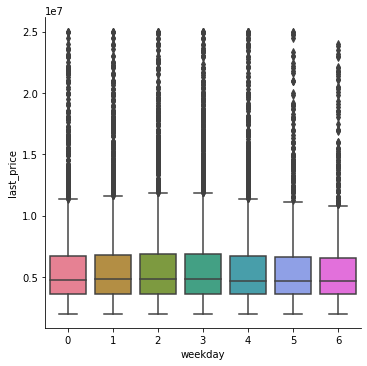

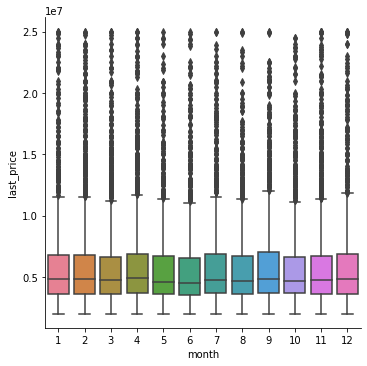

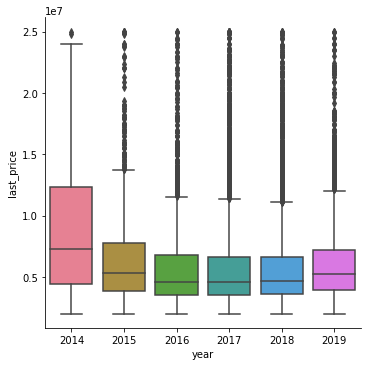

In [ ]:
for column in ['weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=data_new, palette='husl')

Даты размещения существенно не сказывались на цене на недвижимость, только последний график показал чуть более высокие цены  в 2014, 2015 и 2019 годах.

Посмотрим, что покажет <b>матрица корреляции факторов</b>, предположительно влияющих на цену квартир.

In [ ]:
cols=['last_price','living_area','floor','rooms','last_price','kitchen_area']
data_new[cols].corr()

,last_price,living_area,floor,rooms,last_price,kitchen_area
last_price,1.000000,0.686448,0.039157,0.526154,1.000000,0.588764
living_area,0.686448,1.000000,-0.130564,0.876907,0.686448,0.314796
floor,0.039157,-0.130564,1.000000,-0.178317,0.039157,0.146987
rooms,0.526154,0.876907,-0.178317,1.000000,0.526154,0.182153
last_price,1.000000,0.686448,0.039157,0.526154,1.000000,0.588764
kitchen_area,0.588764,0.314796,0.146987,0.182153,0.588764,1.000000


Представленная таблица подтвержает умеренную связь между жилой площадью, количеством комнат и ценой объекта.

## Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
median_price10 = data_new.pivot_table(index='locality_name', values='price_per_sq', aggfunc=['count', 'median'])
median_price10.columns = ['count', 'median']
median_price10.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15169,103951.40
поселок Мурино,571,86272.50
поселок Шушары,436,76876.20
Всеволожск,378,65934.45
Пушкин,361,99744.20
Колпино,337,74722.20
поселок Парголово,324,91984.45
деревня Кудрово,298,91930.25
Гатчина,287,69444.40


В отсортированной по убыванию таблице видно, что самая высокая цена квадратного метра в Санкт-Петербурге, а самая низкая - в Выборге. Однако интересным является тот факт, что в отдельных населенных пунктах сельской местности тоже цена квадратного метра достаточно высокая: поселок Парголово, деревня Кудрово.

## Исследование стоимости объектов недвижимости от расстояния до центра Санкт-Петербурга.


In [ ]:
data_spb=data_new.query('locality_name=="Санкт-Петербург"& cityCenters_nearest_km>=0')
data_spb.sort_values('cityCenters_nearest',ascending=False)
data_spb = data_spb.pivot_table(index='cityCenters_nearest_km', values=['price_per_sq', 'last_price'], aggfunc='mean')
data_spb.head()

,last_price,price_per_sq
cityCenters_nearest_km,,
-0.0,8.716140e+06,126982.567742
1.0,1.115317e+07,132874.278261
2.0,1.088568e+07,126928.871273
3.0,9.524234e+06,115385.508735
4.0,9.971388e+06,123364.011406


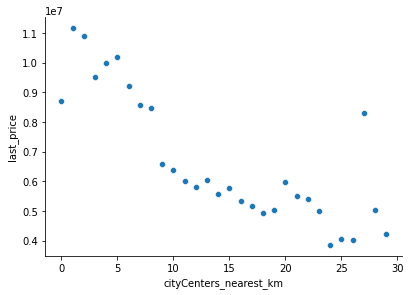

In [ ]:
sns.relplot(x=data_spb.index, y='last_price', data=data_spb, height=4, aspect=1.4)

count    1470.000000
mean        2.869388
std         1.308433
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: rooms, dtype: float64

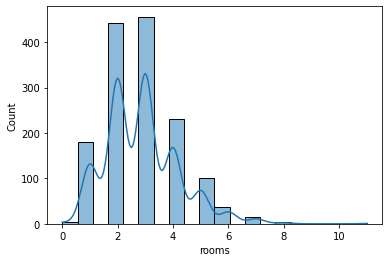

In [ ]:
data_spb=data_new.query('locality_name=="Санкт-Петербург"& cityCenters_nearest_km<=4')
sns.histplot(data=data_spb,x='rooms',kde=True,bins=20)
data_spb.rooms.describe()

count    1470.000000
mean       85.436483
std        37.783921
min        12.000000
25%        60.000000
50%        78.150000
75%       103.875000
max       281.100000
Name: total_area, dtype: float64

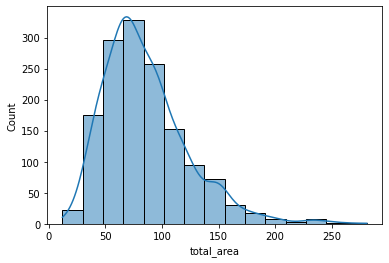

In [ ]:
sns.histplot(data=data_spb,x='total_area',kde=True,bins=15)
data_spb.total_area.describe()

count    1470.000000
mean      221.582993
std       253.406318
min         3.000000
25%        74.000000
50%        95.000000
75%       285.000000
max      1477.000000
Name: days_exposition, dtype: float64

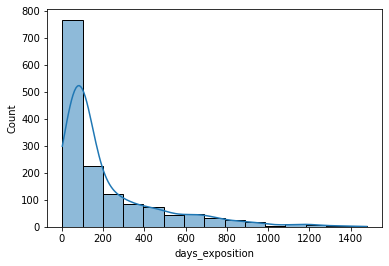

In [ ]:
sns.histplot(data=data_spb,x='days_exposition',kde=True,bins=15)
data_spb.days_exposition.describe()

count    1.470000e+03
mean     1.011793e+07
std      4.676865e+06
min      2.100000e+06
25%      6.800000e+06
50%      8.990000e+06
75%      1.250000e+07
max      2.500000e+07
Name: last_price, dtype: float64

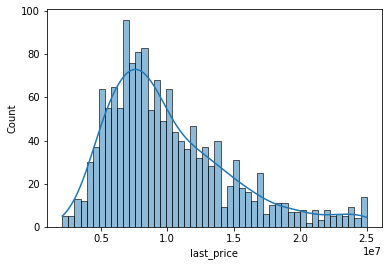

In [ ]:
sns.histplot(data=data_spb,x='last_price',kde=True,bins=50)
data_spb.last_price.describe()

Средняя квартира, продаваемая в центре Санкт-Петербурга имеет следующие характеристики: 3-хкомнатная квартира, общей площадью порядка 85 кв.м, которая продавалась около 7 месяцев.  Стоимость квартиры составила около 10 млн рублей

In [ ]:
print('Медианные значения для квартир центра Санкт-Петербурга:')
for column in ['total_area', 'rooms', 'days_exposition','last_price']:
    print(column,data_spb[column].median())

Медианные значения для квартир центра Санкт-Петербурга:
total_area 78.15
rooms 3.0
days_exposition 95.0
last_price 8990000.0


### Общий вывод

Файл /datasets/real_estate_data.csv' содержит данные по 23699 объектам недвижимости, каждый из которых описывается 22 признаками (17 количественных, 2 логических, 3 категориальных). У некоторых признаков есть пропущенные значения, которые необходимо обработать.
Предварительные выводы по исходным данным:
1. first_day_exposition -  необходимо преобразовать в тип дата-время (datetime)
2. ceiling_height - присутствуют нулевые значения
3. floors_total - необходимо преобразовать в int, т.к. количество этажей вероятно должно быть целым
4. is_apartment - должен быть логическим типом
5. living_area - присутствуют нулевые значения
6. kitchen_area - присутствуют нулевые значения
7. balcony - нулевые значения (скорее всего в таком случае балконы отсутствуют)
8. locality_name - нулевые значения
9. airports_nearest - нулевые значения
10. cityCenters_nearest - нулевые значения
11. parks_around3000 - число парков должно быть целым - int
12. parks_nearest - нулевые значения
13. ponds_around3000 - число водоемов должно быть целым - int
14. ponds_nearest - нулевые значения
15. days_exposition - количество дней должно быть int
<p>Пропуски в столбцах с высотой потолка и днями размещения объявлений можно заполнить медианными значениями, т.к. это не сильно повлияет на ход исследования. Отсутствие значений в столбце с балконами может говорить о том, что их нет в квартире, поэтому заполнили их нулями. Также поступили с данными о прудах.
Строки с пропусками в названиях населенных пунктов удалили, однако пропуски в столбце расстояния до центра нулями лучше не компенсировать. Это может сказаться на исследовании.</p>
<p><b>Неявные дубликаты</b></p>
<p>В столбце с названиями населенных пунктов были обнаружены скрытые дубликаты, например, вероятно городской поселок и поселок городского типа одно и тоже. Для корректности исследования заменили также поселок на деревню, если названия совпадали.</p>
<p><b>Новые столбцы</b></p>
<p>Для дальнейших исследований создали новые столбцы, которые содержат информацию о цене на один квадратный метр, день, месяц и год публикации объявления. Создали также отдельный столбец с категориями этажей: первый, последний и другой.</p>
<p><b>Факторы, оказывающие влияние на стоимость объектов жилой недвижимости:</b></p>
<p>-общая площадь (чем больше площадь, тем выше цена)</p>
<p>-расстояние до центра города (мы видим, что на некотором расстоянии - 3-5 км, цены существенно ниже)</p>
<p>-число комнат(однокомнатные квартиры дешевле 2-х и 3-хкомнатных)</p>
<p>-этаж квартиры (на первом этаже квартиры имеют более низкую стоимость)</p>
<p>-дата размещения существенного влияния на стоимость не оказывает</p>
<p></p>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод